In [9]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "text.color" : "w"}
plt.rcParams.update(params) #dark theme

Zadanie 3. (1 punkt)<br>
a) Wczytaj dane IRIS. Można to szybko zrobić korzystając z biblioteki SciKit za pomocą polecenia:<br>
from sklearn import datasets<br>
iris = datasets.load_iris()<br>
Zobacz co zawiera iris.data, iris.target, iris.feature_names, iris.target_names.<br>
b) Przedstaw wczytane dane na wykresie w poniższy sposób (zwróć uwagę na kolory i typ
znaczników, opisy osi i tytuł wykresu):<br>
c) Zmień zakres osi: oś X powinna pokazywać wartości od 3 do 9, a oś Y od 1 do 5.<br>
d) Zmień podziałki na osiach, tak aby zaznaczone były tylko liczby całkowite.<br>
e) Każdy gatunek irysa zaznacz innym kolorem.<br>
f) Zapisz rysunek do pliku zadanie1.png.<br>

In [10]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
iris = datasets.load_iris()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


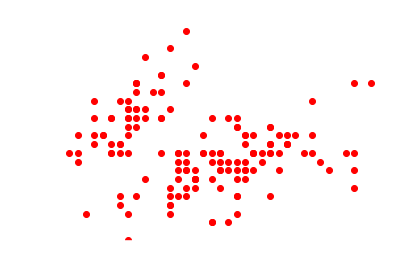

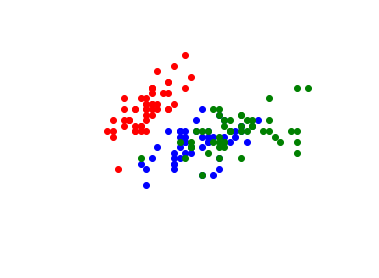

In [15]:
#print(iris.data) #wymiary
#print(iris.target) #gatunek
print(iris.feature_names) 
print(iris.target_names)#gatunki - 3
sl = iris.data[:,0] #dane do podanego wykresu
sw = iris.data[:,1]

sl0 = iris.data[:50,0] #wczytywanie danych do podzielenia wzgledem gatunku
sw0 = iris.data[:50,1]
sl1 = iris.data[50:100,0]
sw1 = iris.data[50:100,1]
sl2 = iris.data[100:,0]
sw2 = iris.data[100:,1]

plt.plot(sl,sw, 'ro')
plt.title('Iris') #odwzorowanie podanego wykresu
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.xticks(np.arange(4, 9, 0.5)) 
plt.yticks(np.arange(2, 5.5, 0.5)) 
plt.xlim(4,8)
plt.ylim(2,4.5)
plt.show()

plt.plot(sl0,sw0, 'ro', sl1,sw1, 'bo', sl2,sw2, 'go')

plt.title('Iris')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.xlim(3,9)
plt.ylim(1,5)
plt.xticks(np.arange(3, 10, 1)) 
plt.yticks(np.arange(1, 6, 1)) 
plt.savefig('iris.eps')

In [12]:
#odleglosc od prostej
def shortest_distance(x1, y1, a, b, c):    
    return abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 

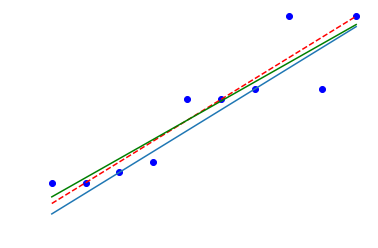

6.8000000000000025 [1.83636364]
suma odl default 8.497058314499201 
suma odl zmiana wyr wolnego 7.602631123499285 
suma dla regresji liniowej 8.499737103473546


In [19]:
X = np.array([[1,10],[2,10],[3,11],[4,12],[5,18],[6,18],[7,19],[8,26],[9,19],[10,26]])
#print(X)
x = X[:,0]
y = X[:,1]
plt.plot(x,y, 'bo')
plt.plot(x,2*x+5)
leng = np.shape(X)[0]
z1 = np.zeros((1,leng)); z2 = np.zeros((1,leng)); z3 = np.zeros((1,leng))
for i in range(leng):
    z1[0][i] = shortest_distance(X[i][0], X[i][1], 2, -1, 5) #podana prosta
for i in range(leng):
    z2[0][i] = shortest_distance(X[i][0], X[i][1], 2, -1, 6)#wlasna proba    
for i in range(leng):
    z3[0][i] = shortest_distance(X[i][0], X[i][1], 1.84, -1, 6.8) # z regresji
    ############################# linear regression z bibioteki
model = LinearRegression()
x1 = x.reshape((-1, 1))
#print(np.shape(x), np.shape(y))
#print(x1,y)
plt.plot(x,2*x +6, 'r--', x, 1.84*x + 6.8, 'g-')
plt.savefig('zadanie3a.png')
plt.show()

model = LinearRegression().fit(x1, y)
print(model.intercept_, model.coef_) #wdpolczynniki lin regresji
print( 'suma odl default', np.sum(z1), '\nsuma odl zmiana wyr wolnego', np.sum(z2), 
      '\nsuma dla regresji liniowej',np.sum(z3))
